##                                     **HEART DISEASE PREDICTION USING MACHINE LEARNING**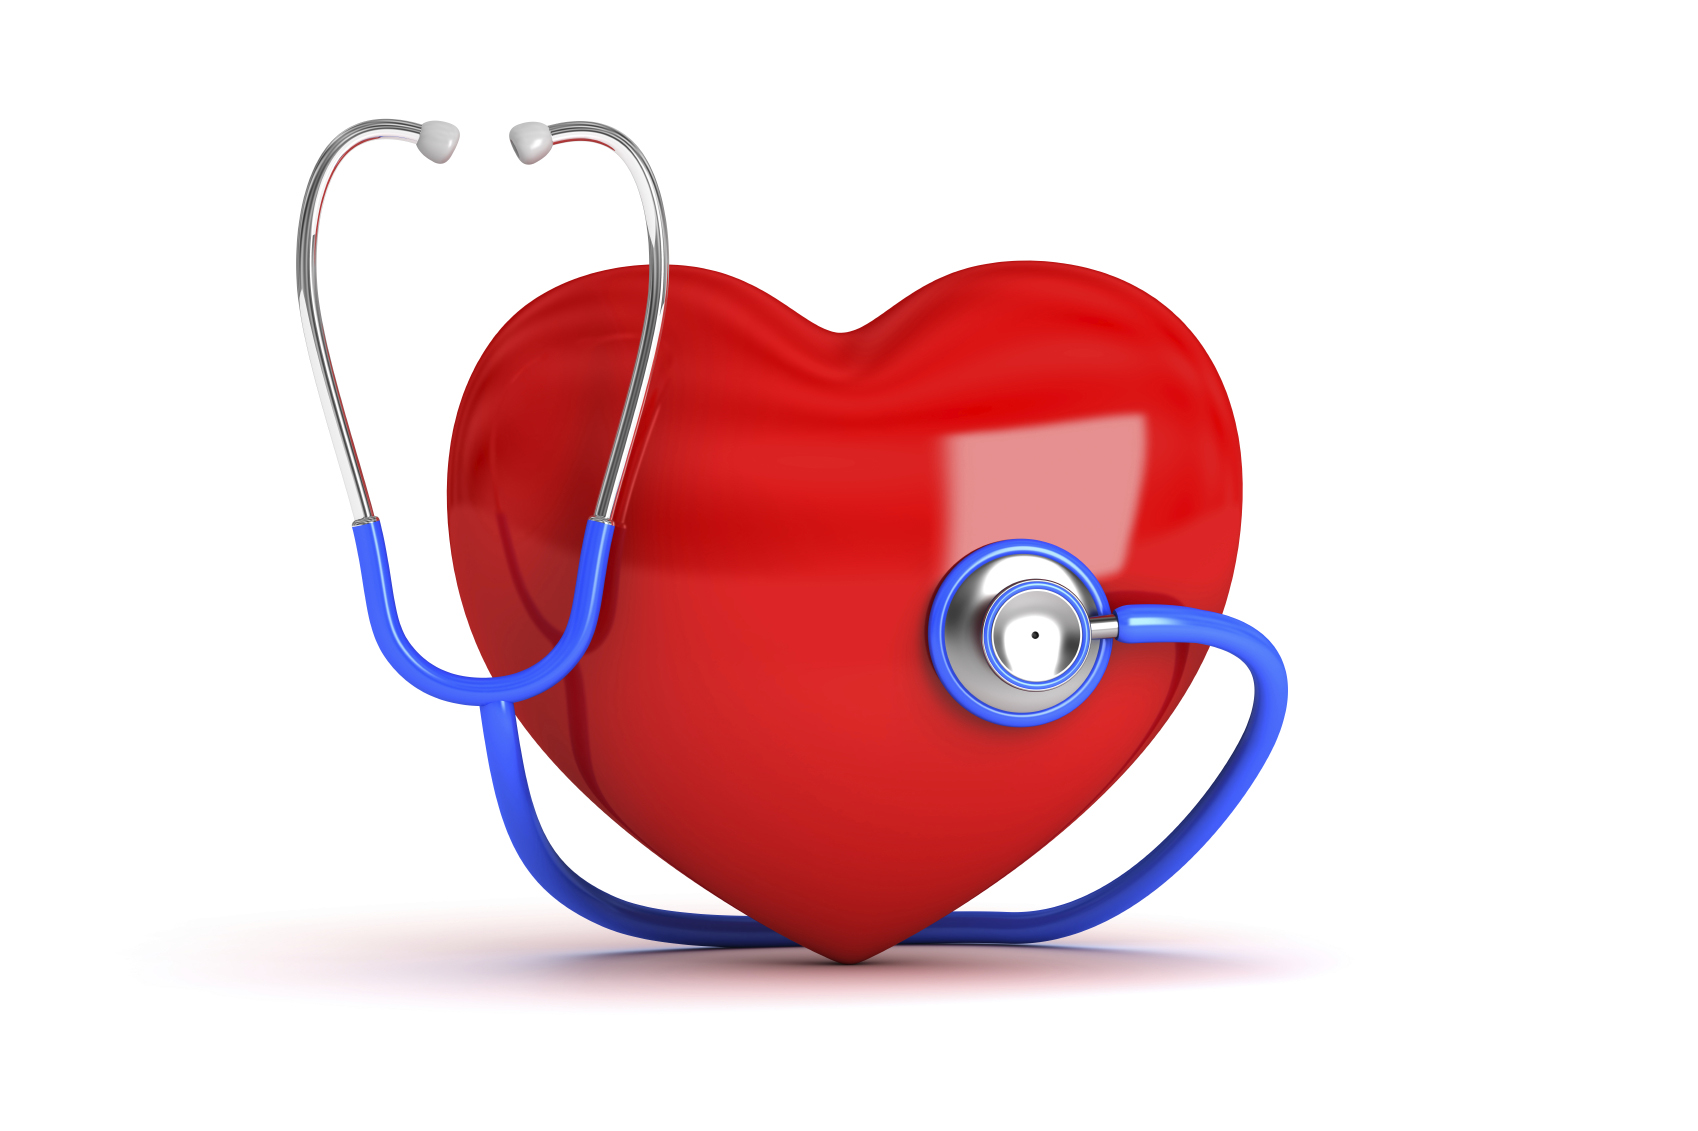

**Importing Neccessary Libraries**

Plotting Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

Metrics for Classification Technique

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Scaler

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

Model Building

In [22]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

**Data Loading**

Importing Data

In [23]:
data = pd.read_csv("/content/heart.csv")
# Mention no. of rows to be displayed from the top in the argument
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


**Exploratory Data Analysis**

In [24]:
# size of the dataset
data.shape

(918, 12)

In [25]:
# type of each feature that our dataset holds
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [26]:
#  let’s see how statistically the dataset is spread.
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


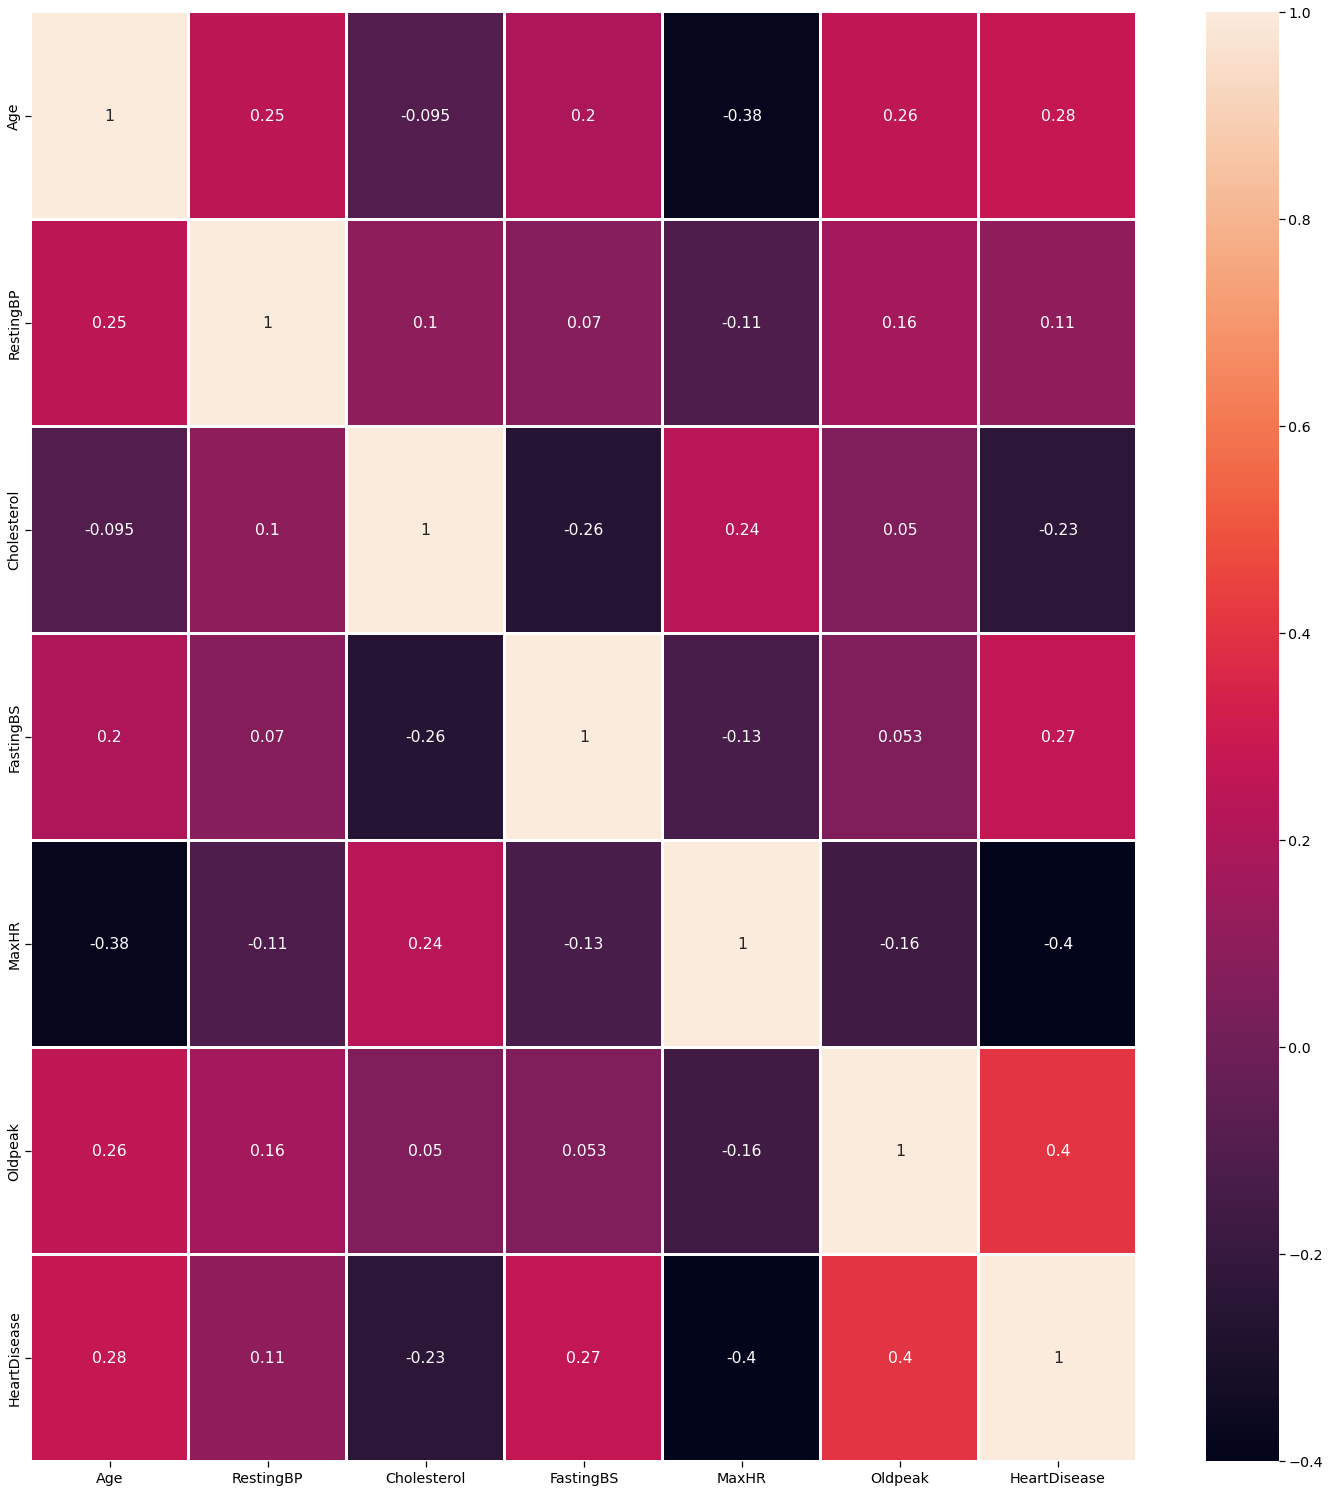

In [27]:
# Let’s check the correlation between various features.
plt.figure(figsize=(20,21))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

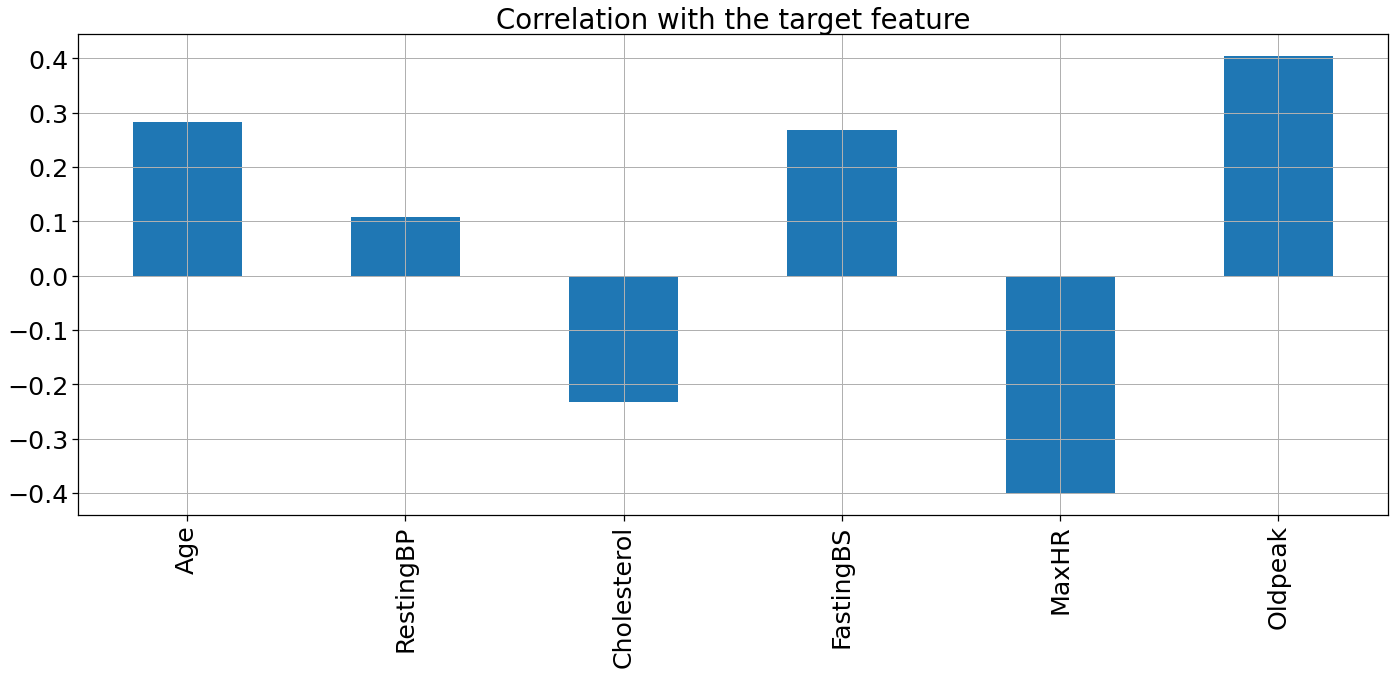

In [28]:
# Checking the correlation of the target variable.
sns.set_context('notebook',font_scale= 2.3)
data.drop('HeartDisease', axis=1).corrwith(data.HeartDisease).plot(kind='bar', grid=True,figsize=(20,10),title="Correlation with the target feature")
plt.tight_layout()


Analysis of the individual features

**Age Feature Analysis**

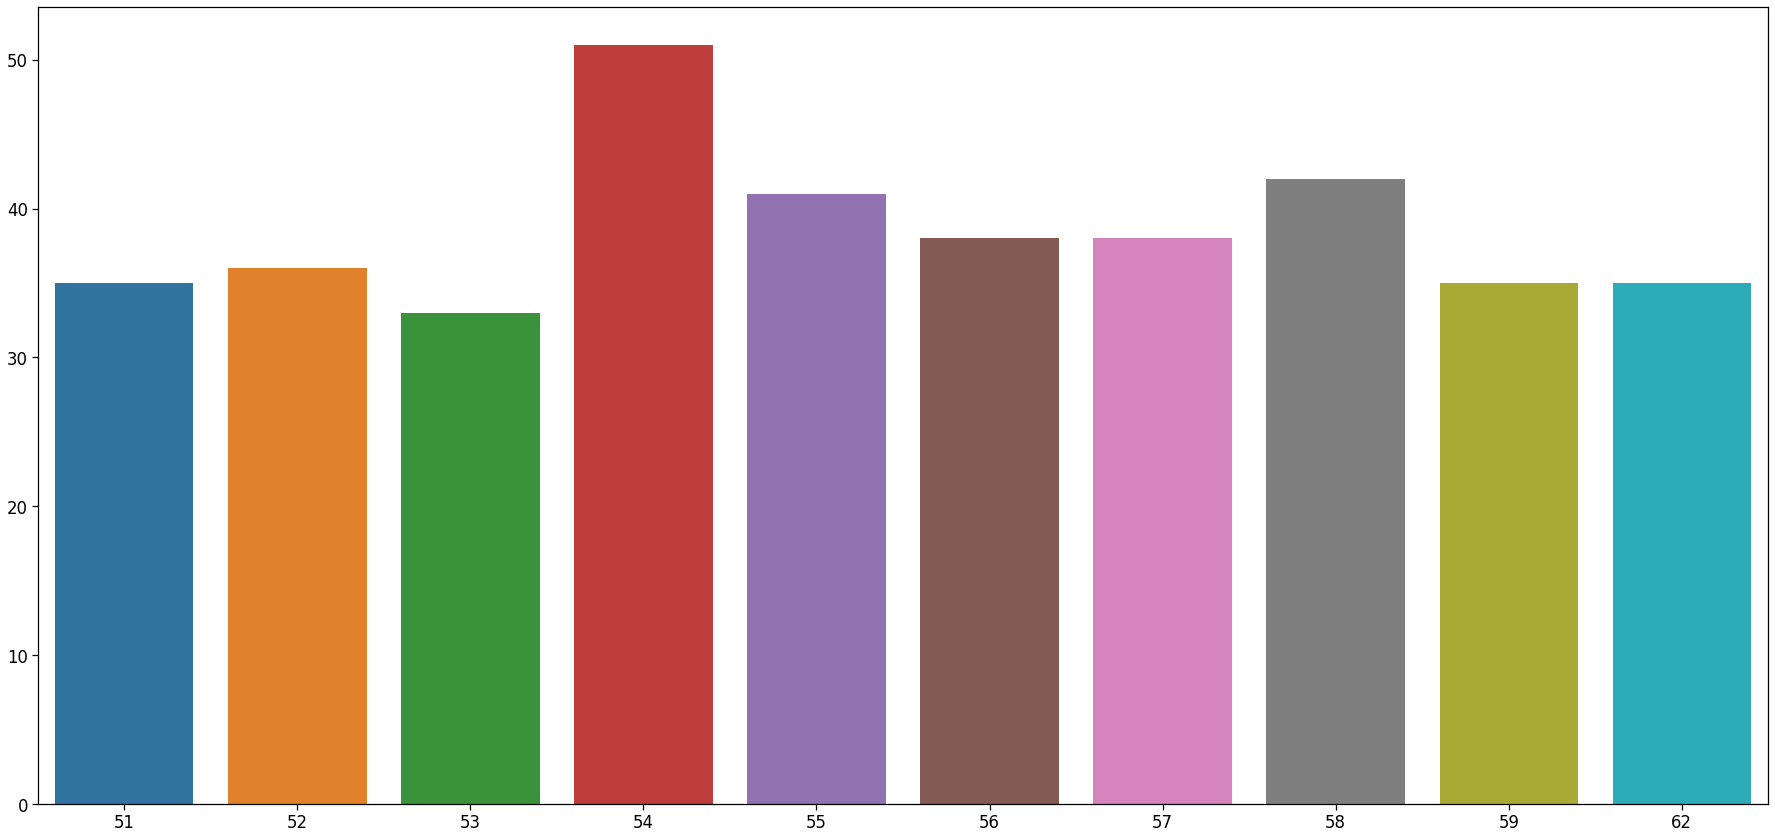

In [29]:
# Here we will be checking the 10 ages and their counts.
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.tight_layout()

In [30]:
# Let’s check the range of age in the dataset.

minAge = min(data.Age)
maxAge = max(data.Age)
meanAge = data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)


Min Age : 28
Max Age : 77
Mean Age : 53.510893246187365


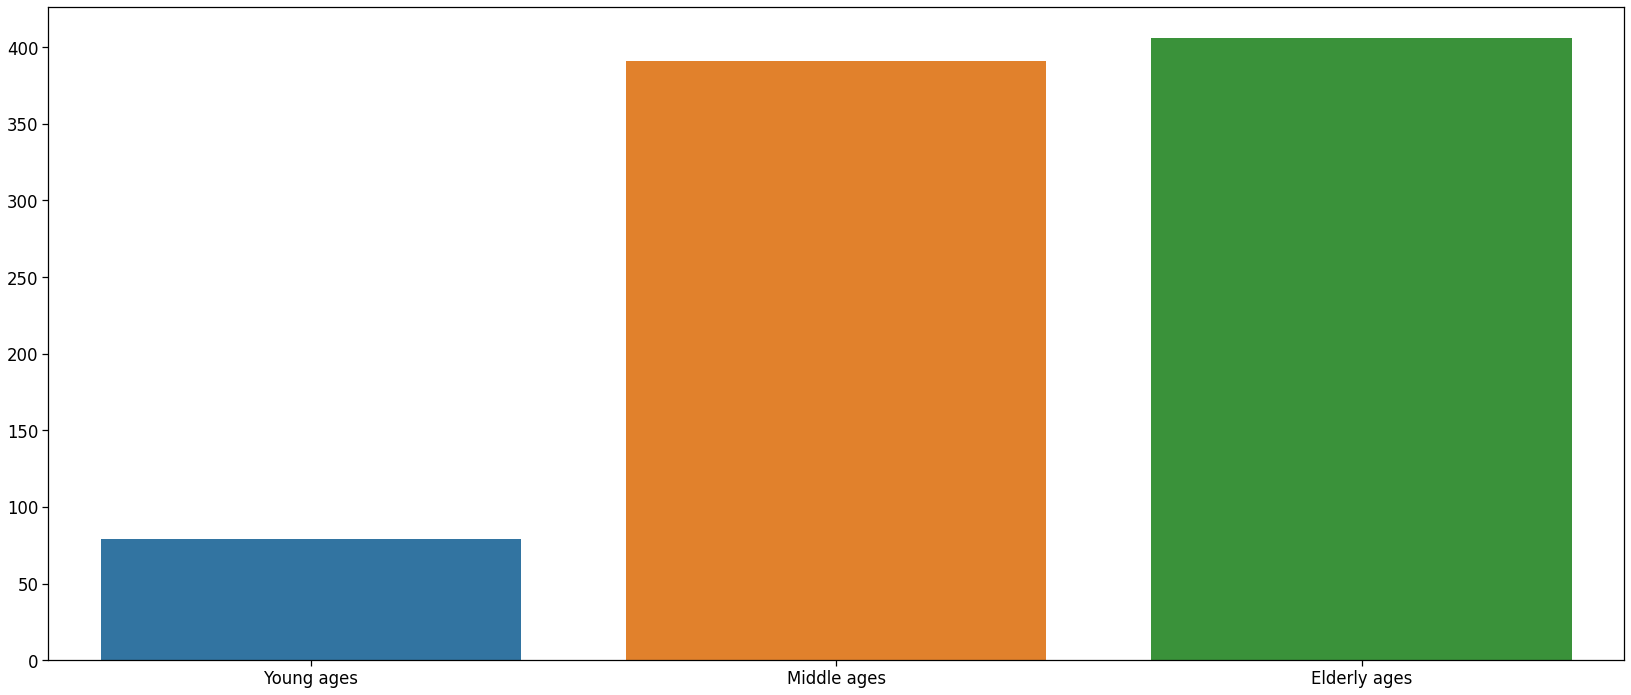

In [31]:
# We will divide the Age feature into three parts – “Young”, “Middle” and “Elder”.

Young = data[(data.Age>=29)&(data.Age<40)]
Middle = data[(data.Age>=40)&(data.Age<55)]
Elder = data[(data.Age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['Young ages', 'Middle ages' , 'Elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

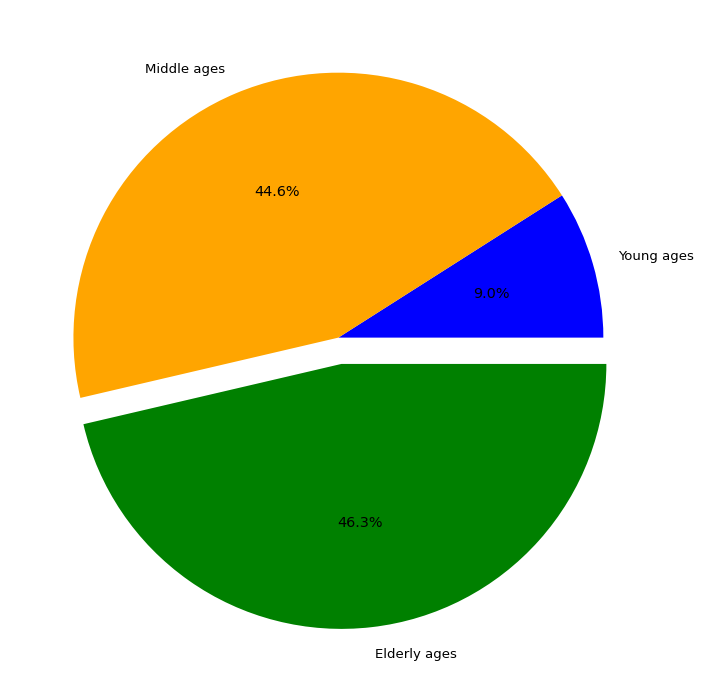

In [32]:
# PIE CHART

colors = ['blue', 'orange','green']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['Young ages','Middle ages','Elderly ages'],explode=explode, colors=colors, autopct='%1.1f%%')
plt.tight_layout()

**Sex Feature Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



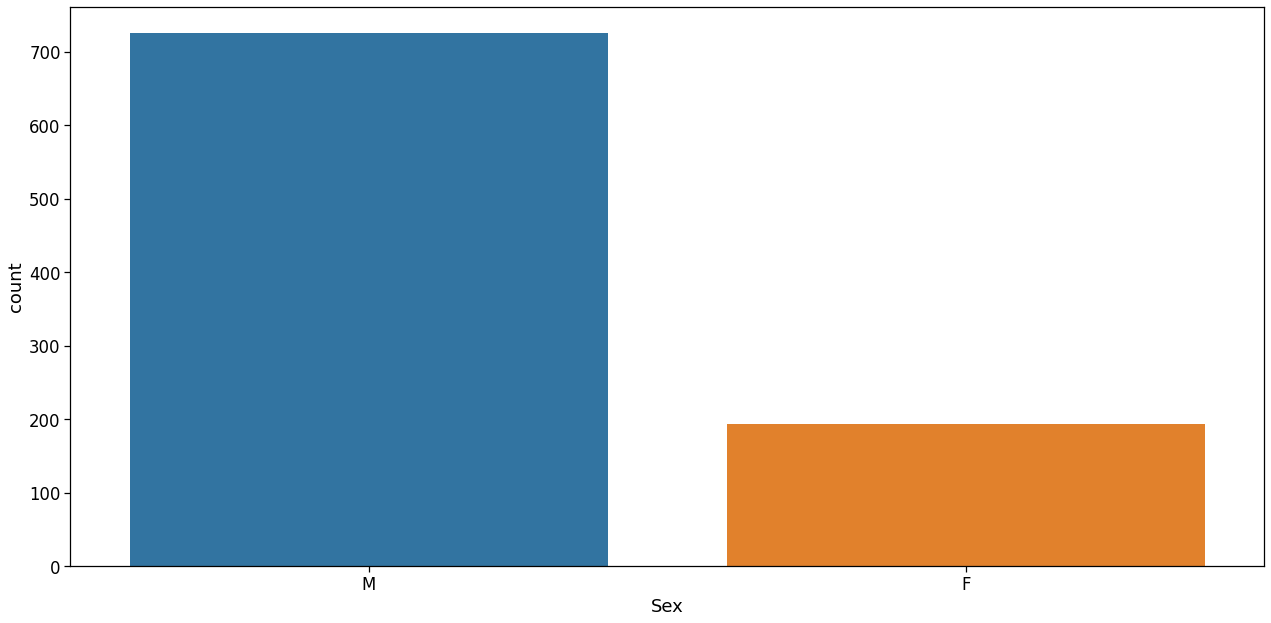

In [33]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale= 1.5)
sns.countplot(data['Sex'])
plt.tight_layout()

**Chest Pain Type ("cp") Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



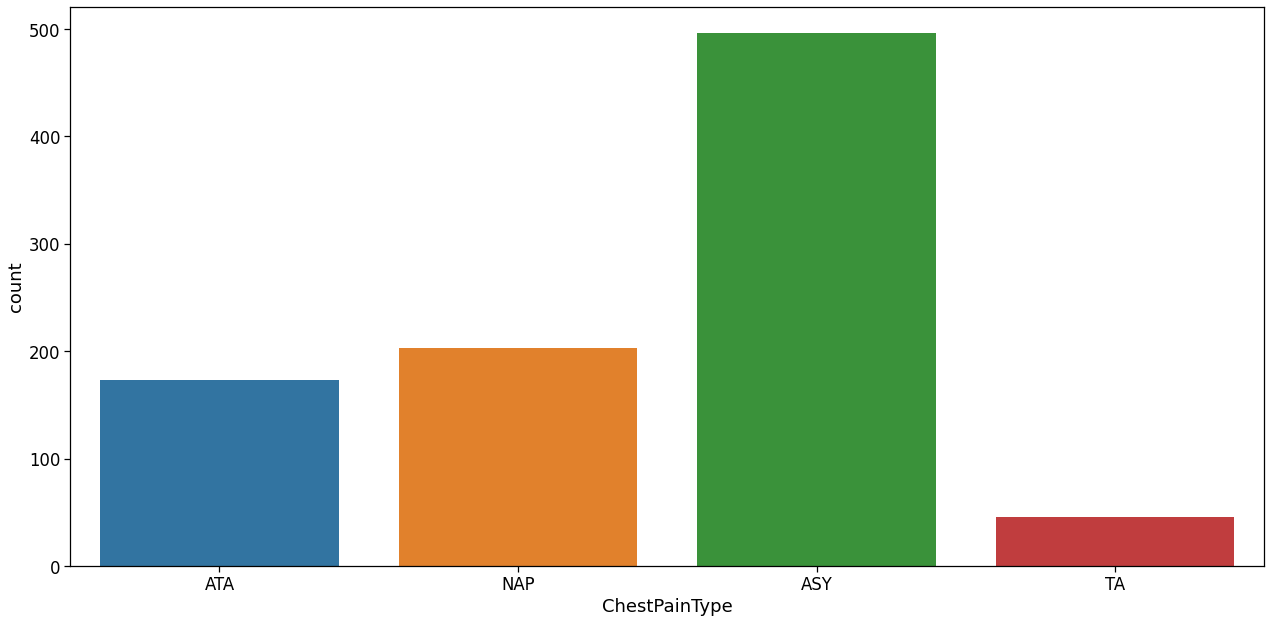

In [34]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale =1.5)
sns.countplot(data['ChestPainType'])
plt.tight_layout()

# People having the least chest pain are not likely to have heart disease.
# People having severe chest pain are likely to have heart disease.
# Elderly people are more likely to have chest pain.



Inference: As seen, there are 4 types of chest pain

1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad




**Heart Disease ( Target )**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



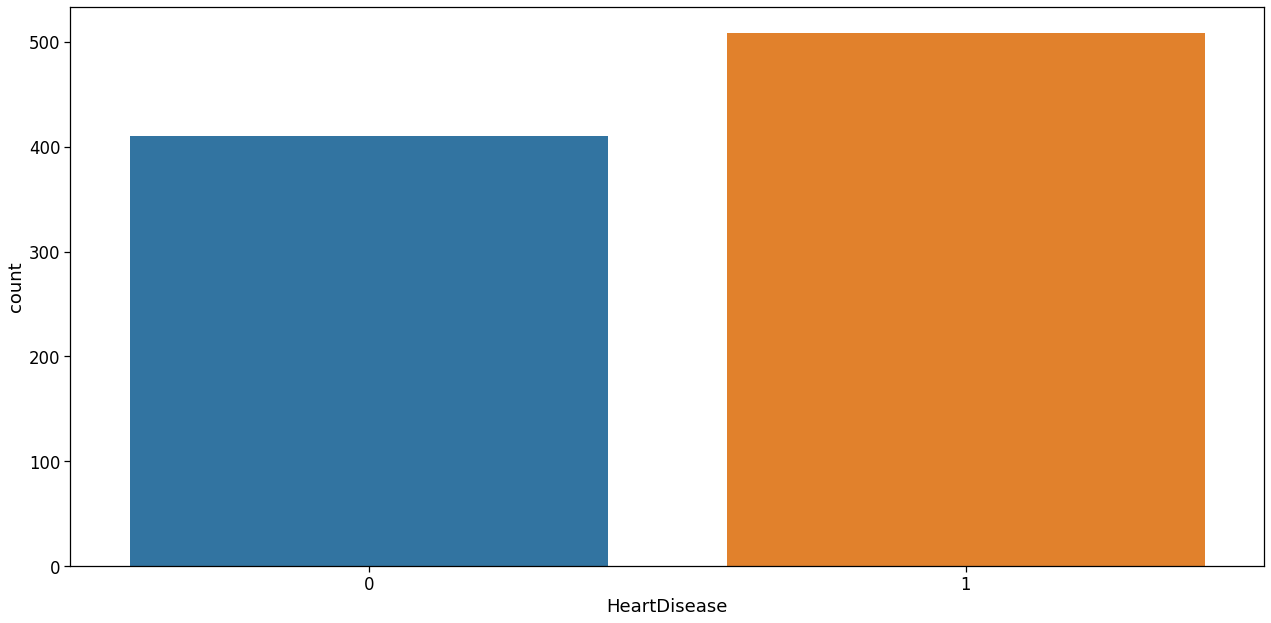

In [35]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale= 1.5)
sns.countplot(data['HeartDisease'])
plt.tight_layout()

Inference: The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.


**Feature Engineering**

In [36]:
# Now we will see the complete description of the continuous data as well as the categorical data
categorical_val =[]
continous_val =[]
for column in data.columns:
  print("------------------------")
  print(f"{column} : {data[column].unique()}")
  if len(data[column].unique())<=10:
    categorical_val.append(column)
  else:
    continous_val.append(column)  

------------------------
Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
------------------------
Sex : ['M' 'F']
------------------------
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
------------------------
RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
------------------------
Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 33

In [37]:
categorical_val.remove('HeartDisease')
dfs = pd.get_dummies(data, columns= categorical_val)
dfs.head(6) 

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5,39,120,339,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [39]:
# Now we will be using the standard scaler method to scale down the data so that it won’t raise the outliers also dataset which is scaled to general units leads to having better accuracy
sc = StandardScaler()
col_to_scale = ['Age' , 'Cholesterol' , 'Oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6) 

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,140,0.825070,172,-0.832432,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,-0.478484,160,-0.171961,156,0.105664,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,130,0.770188,98,-0.832432,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,-0.584556,138,0.139040,108,0.574711,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,0.051881,150,-0.034755,122,-0.832432,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5,-1.539213,120,1.282424,170,-0.832432,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


# **MODELING**
 **Spilting our Dataset**

In [42]:
X = dfs.drop('HeartDisease', axis = 1)
y = dfs.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
X_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
712,0.476173,100,0.321981,156,-0.738623,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,1
477,0.794391,110,-1.818435,108,1.043759,0,1,1,0,0,...,0,1,0,1,0,0,1,1,0,0
409,-0.054192,160,-1.818435,122,-0.832432,0,1,0,0,1,...,0,1,1,0,0,0,1,0,1,0
448,1.006537,160,0.285393,105,0.105664,0,1,1,0,0,...,0,1,0,1,0,0,1,0,1,0
838,1.006537,130,1.200100,132,0.856140,0,1,1,0,0,...,0,1,1,0,0,0,1,0,0,1


We will work on following algo -

1. KNN

2. Random 
Forest Classifier

**The KNN Machine Learning Algorithm**

In [44]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.7101449275362319


We achieved accuracy 71% approx with KNN Model. 

**Random Forest Classifier**

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

In [51]:
print(accuracy_score(y_test,y_pred2))

0.8913043478260869


We achieved accuracy 89% approx with Random Forest Classifier Model. 

**Conclusion:**
***From the above models Random Forest Classifier is giving us the best accuracy which is 89%.***